In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import readline
import os

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


In [2]:
# Open File
def Create_DF(File):
    Data = open(File, 'r')
    Rows = []
#
# Organize Data
    for Line in Data:
        Rows.append(Line.strip())
#print (Rows)
#
# Organize Data Into Dictionary Containing Arrays
    Storm_Code = []
    Storm_List = []
    for i in range(len(Rows)):
        if Rows[i][0:5] == 'start':
            Code = Rows[i][41:45]
            Storm_List.append(Code)
        else:
            Storm_Code.append(Code)
    Array = numpy.zeros((13, len(Rows)-len(Storm_List)))
    Time = []
    k = -1
    for i in range(len(Rows)):
        if Rows[i][0:5] == 'start':
            k += 1
        else:
            l = len(Rows[i]) - 100
            Array[0][i-k-1] = float(Rows[i][0:6+l])
            Array[1][i-k-1] = float(Rows[i][9+l:14+l])
            Array[2][i-k-1] = float(Rows[i][17+l:24+l])
            Array[3][i-k-1] = float(Rows[i][27+l:31+l])
            Array[4][i-k-1] = float(Rows[i][34+l:41+l])
            Array[5][i-k-1] = float(Rows[i][44+l:51+l])
            Array[6][i-k-1] = float(Rows[i][54+l:61+l])
            Array[7][i-k-1] = float(Rows[i][64+l:71+l])
            Array[8][i-k-1] = float(Rows[i][74+l:81+l])
            Time.append(datetime.datetime(year=int(Rows[i][84+l:88+l]), month=int(Rows[i][90+l:92+l]), \
            day=int(Rows[i][94+l:96+l]), hour=int(Rows[i][98+l:100+l])))
#        Array[9][i-k-1] = int(Rows[i][84:88])
#        Array[10][i-k-1] = int(Rows[i][90:92])
#        Array[11][i-k-1] = int(Rows[i][94:96])
#        Array[12][i-k-1] = int(Rows[i][98:100])
#        print (Rows[i])
#        print (float(Rows[i][9:14]))
#        print (Rows[i][17])
#print (Array)
#
# Create DataFrame to Store Data
    DF = pandas.DataFrame({"Code": Storm_Code, "Lon": Array[0], "Lat": Array[1], "SLP(hPa)": Array[2], \
    "Winds(m/s)": Array[3], "Dist(m)": Array[4], "Angle": Array[5], "B": Array[6], "VLT": Array[7], "VUT": Array[8], \
    "Time(Z)": Time})
#"Year": Array[9], "Month": Array[10], "Day": Array[11], "Hour(Z)": Array[12]})
    return (DF, Storm_List)
ERA_DF_Init, ERA_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/zarzycki2017_data/traj_et_era_avg')
ERA_DF_Init

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z)
0,0001,-59.06,12.98,1006.42,11.8,152.38,270.00,-4.51,3.87,49.37,1980-08-04 00:00:00
1,0001,-60.47,12.98,1005.52,12.7,152.38,270.00,-4.06,4.39,53.04,1980-08-04 06:00:00
2,0001,-62.58,14.39,1006.12,15.3,276.21,304.56,-4.44,-2.48,59.19,1980-08-04 12:00:00
3,0001,-64.69,14.39,1004.47,14.8,227.20,270.00,-5.56,-2.49,64.16,1980-08-04 18:00:00
4,0001,-67.50,15.09,1003.41,15.8,312.36,284.51,-6.11,-2.98,67.49,1980-08-05 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2779,0135,-49.22,36.14,1005.24,14.6,323.81,103.85,28.70,-104.98,-173.87,2002-10-16 06:00:00
2780,0135,-46.41,36.14,1007.32,20.3,252.56,90.00,26.01,-103.07,-163.51,2002-10-16 12:00:00
2781,0135,-44.30,35.44,1004.96,21.5,205.64,112.16,22.16,-98.91,-147.28,2002-10-16 18:00:00
2782,0135,-42.89,34.74,1006.77,19.4,149.87,121.20,20.14,-97.69,-138.68,2002-10-17 00:00:00


In [3]:
# Define Cyclone Type, Set Shape and Colour Code
SLP_Colours = ['indigo', 'purple', 'darkviolet', 'mediumvioletred', 'deeppink', 'red', 'orangered', \
'darkorange', 'orange', 'gold', 'yellow', 'greenyellow', 'limegreen', \
'lightseagreen', 'darkcyan', 'dodgerblue', 'deepskyblue', 'cyan']
SLP_Bounds = numpy.arange(930,1015,5)
#SLP_Colour_Labels = ['>1010hPa', '1005-1010hPa', '1000-1005hPa', '995-1000hPa', '990-995hPa', \
#'985-990hPa', '980-985hPa', '975-980hPa', '970-975hPa', '965-970hPa', '960-965hPa', \
#'955-960hPa', '950-955hPa', '945-950hPa', '940-945hPa', '935-940hPa', '930-935hPa', '<=930hPa'].reverse()
def Cyclone_Type(DF, Storm_List):
# Cyclone Type and Shape Code
    Cyclone_Type = []
    Plot_Shape = []
    for i in range(len(Storm_List)):
        DF_Storm = DF[DF['Code'] == Storm_List[i]]
        for j in range(len(DF_Storm)):
            if j != 0:
                if numpy.array(DF_Storm['B'])[j] < 15 and numpy.array(DF_Storm['VLT'])[j] > 0:
                    Cyclone_Type.append("Tropical")
                    Plot_Shape.append("o")
                elif numpy.array(DF_Storm['B'])[j] > 15 and numpy.array(DF_Storm['VLT'])[j] < 0:
                    Cyclone_Type.append("Extratropical")
                    Plot_Shape.append("^")
                else:
                    Cyclone_Type.append("Transition")
                    Plot_Shape.append("s")
            else:
                if numpy.array(DF_Storm['B'])[j+1] < 15 and numpy.array(DF_Storm['VLT'])[j+1] > 0:
                    Cyclone_Type.append("Tropical")
                    Plot_Shape.append("o")
                elif numpy.array(DF_Storm['B'])[j+1] > 15 and numpy.array(DF_Storm['VLT'])[j+1] < 0:
                    Cyclone_Type.append("Extratropical")
                    Plot_Shape.append("^")
                else:
                    Cyclone_Type.append("Transition")
                    Plot_Shape.append("s")
    #print (Plot_Shape)
    DF["Type"] = Cyclone_Type
    DF["Shape"] = Plot_Shape
#    
# SLP Colour Code
    Plot_Colour = []
    for i in range(len(DF['SLP(hPa)'])):
        for k in range(len(SLP_Colours)):
            if k == 0:
                if DF['SLP(hPa)'][i] <= SLP_Bounds[k]:
                    Plot_Colour.append(SLP_Colours[k])
            elif k != len(SLP_Colours)-1:
                if DF['SLP(hPa)'][i] <= SLP_Bounds[k] and DF['SLP(hPa)'][i] > SLP_Bounds[k-1]:
                    Plot_Colour.append(SLP_Colours[k])
            else:
                if DF['SLP(hPa)'][i] > SLP_Bounds[k-1]:
                    Plot_Colour.append(SLP_Colours[k])
    #print (Plot_Colour)
    DF["Colour"] = Plot_Colour
    return (DF)
ERA_DF = Cyclone_Type(ERA_DF_Init, ERA_Storm_List)

In [4]:
# Create Legend
def SLP_Legend(Loc):
#    for c in range(len(SLP_Colours)):
#        pyplot.scatter([-728], [-728], c=SLP_Colours[c], label=SLP_Colour_Labels[c])
    pyplot.scatter([-728], [-728], c='cyan', marker='o', linewidths=0.8, edgecolors='black', label='Tropical')
    pyplot.scatter([-728], [-728], c='cyan', marker='s', linewidths=0.8, edgecolors='black', label='Transition')
    pyplot.scatter([-728], [-728], c='cyan', marker='^', linewidths=0.8, edgecolors='black', label='Extratropical')
    pyplot.legend(loc=Loc, fontsize=12)

In [5]:
# Plot Cyclone Track
def Plot_Cyclone_Track(Storm_Code, DF, Bounds, Colours, Loc):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Lon = numpy.array(DF_Storm['Lon'])
    Lat = numpy.array(DF_Storm['Lat'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(10,10))
    Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
    Axis.coastlines()
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    Axis.plot(Lon, Lat, c='black', linewidth=0.5, alpha=0.8)
    for k in range(len(Lon)):
        pyplot.scatter(Lon[k], Lat[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.8, edgecolors='black', s=78)
#
# Formatting
    x_Min = (int(round(numpy.min(Lon) / 5)) - 1) * 5
    x_Max = (int(round(numpy.max(Lon) / 5)) + 1) * 5
    y_Min = (int(round(numpy.min(Lat) / 5)) - 1) * 5
    y_Max = (int(round(numpy.max(Lat) / 5)) + 1) * 5
    x_Axis = numpy.arange(x_Min,x_Max+5,5)
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='silver', linestyle='-')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("SLP(hPa)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.025, -0.12, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, label='SLP(hPa)', shrink=0.7)
    SLP_Legend(Loc)

In [6]:
# Plot Cyclone SLP
def Plot_Cyclone_SLP(Storm_Code, DF, Bounds, Colours, Loc):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Time = list(DF_Storm['Time(Z)'])
    SLP = numpy.array(DF_Storm['SLP(hPa)'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(12,8))
    Axis = Fig.add_subplot(1,1,1)
    Axis.plot(Time, SLP, c='black', linestyle='--', linewidth=0.5, alpha=0.8)
    for k in range(len(Time)):
        Axis.scatter(Time[k], SLP[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.8, edgecolors='black', s=78)
#
# Formatting
    pyplot.xlabel('Time (Z)', fontsize=12)
    pyplot.ylabel('Sea Level Pressure (SLP)', fontsize=12)
    x_Min = Time[0]
    x_Max = Time[len(Time)-1]
    y_Min = (int(round(numpy.min(SLP) / 5)) - 1) * 5
    y_Max = (int(round(numpy.max(SLP) / 5)) + 1) * 5
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("SLP(hPa)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.025, -0.15, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, label='SLP(hPa)', shrink=0.7)
    SLP_Legend(Loc)

In [7]:
# Plot Cyclone Windspeed
def Plot_Cyclone_Winds(Storm_Code, DF, Bounds, Colours, Loc):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    Time = list(DF_Storm['Time(Z)'])
    Winds = numpy.array(DF_Storm['Winds(m/s)'])
    Plot_Colour = list(DF_Storm['Colour'])
    Plot_Shape = list(DF_Storm['Shape'])
#
# Plotting
    Fig = pyplot.figure(figsize=(12,8))
    Axis = Fig.add_subplot(1,1,1)
    Axis.plot(Time, Winds, c='black', linestyle='--', linewidth=0.5, alpha=0.8)
    for k in range(len(Time)):
        Axis.scatter(Time[k], Winds[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.8, edgecolors='black', s=78)
#
# Formatting
    pyplot.xlabel('Time (Z)', fontsize=12)
    pyplot.ylabel('Maximum Windspeed (m/s)', fontsize=12)
    x_Min = Time[0]
    x_Max = Time[len(Time)-1]
    y_Min = 0
    y_Max = (int(round(numpy.max(Winds) / 5)) + 1) * 5
    y_Axis = numpy.arange(y_Min,y_Max+5,5)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(0,y_Max)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("SLP(hPa)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([0.025, -0.15, 0.95, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, label='SLP(hPa)', shrink=0.7)
    SLP_Legend(Loc)

In [8]:
# Plot Cyclone Phase Diagram
def Plot_Cyclone_Phase(Storm_Code, DF, Bounds, Colours, Loc):
    DF_Storm = DF[DF['Code'] == Storm_Code]
    VLT = numpy.array(DF_Storm['VLT'])[1:]
    VUT = numpy.array(DF_Storm['VUT'])[1:]
    B = numpy.array(DF_Storm['B'])[1:]
    Plot_Colour = list(DF_Storm['Colour'])[1:]
    Plot_Shape = list(DF_Storm['Shape'])[1:]
#
# Plotting VUT VLT
    Fig = pyplot.figure(figsize=(16,8))
    Axis = Fig.add_subplot(1,2,1)
    x_Axis = numpy.arange(-500,600,100)
    y_Axis = numpy.arange(-30,130,10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-500,500)
    pyplot.ylim(-30,120)
    pyplot.fill_between([0,500], 15, 120, color='violet', alpha=0.2)
    pyplot.fill_between([-500,0], 15, 120, color='mediumblue', alpha=0.2)
    pyplot.fill_between([0,500], -30, 15, color='red', alpha=0.2)
    pyplot.fill_between([-500,0], -30, 15, color='darkgrey', alpha=0.2)
    pyplot.plot([-500,500], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-30,120], 'black', linewidth=0.5)
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    Axis.plot(VLT, B, c='black', linestyle='--', linewidth=0.8, alpha=0.8)
    for k in range(len(VLT)):
        Axis.scatter(VLT[k], B[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.3, edgecolors='black', s=78)
    SLP_Legend(Loc)
#
# Plotting VUT VLT
    Axis = Fig.add_subplot(1,2,2)
    x_Axis = numpy.arange(-500,600,100)
    y_Axis = numpy.arange(-500,600,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(-500,500)
    pyplot.ylim(-500,500)
    pyplot.fill_between([0,500], 500, color='red', alpha=0.2)
    pyplot.fill_between([-500,0], 500, color='lightskyblue', alpha=0.2)
    pyplot.fill_between([0,500], -500, color='orangered', alpha=0.2)
    pyplot.fill_between([-500,0], -500, color='mediumblue', alpha=0.2)
    pyplot.plot([-500,500], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-500,500], 'black', linewidth=0.5)
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    Axis.plot(VLT, VUT, c='black', linestyle='--', linewidth=0.8, alpha=0.8)
    for k in range(len(VLT)):
        Axis.scatter(VLT[k], VUT[k], c=Plot_Colour[k], marker=Plot_Shape[k], linewidths=0.3, edgecolors='black', s=78)
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("SLP(hPa)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, label='SLP(hPa)', shrink=0.7)

In [9]:
#Plot_Cyclone_Track('0042', ERA_DF, SLP_Bounds, SLP_Colours, 4)

In [10]:
#Plot_Cyclone_SLP('0042', ERA_DF, SLP_Bounds, SLP_Colours, 3)

In [11]:
#Plot_Cyclone_Winds('0042', ERA_DF, SLP_Bounds, SLP_Colours, 2)

In [12]:
#Plot_Cyclone_Phase('0042', ERA_DF, SLP_Bounds, SLP_Colours, 1)

In [13]:
# Create Phase Distribution Bins
def Create_Bins(VT_Min, VT_Max, VT_Bin_Width, B_Min, B_Max, B_Bin_Width):
    VLT_Bins = numpy.arange(VT_Min, VT_Max+VT_Bin_Width, VT_Bin_Width)
    B_Bins = numpy.arange(B_Min, B_Max+B_Bin_Width, B_Bin_Width)
    VUT_Bins = numpy.arange(VT_Min, VT_Max+VT_Bin_Width, VT_Bin_Width)
    return (VLT_Bins, B_Bins, VUT_Bins)
VLT_Bins, B_Bins, VUT_Bins = Create_Bins(-500,500,25,-30,120,5)
#VLT_Bins
#VLT_Bins = numpy.arange(-500,520,20)
#B_Bins = numpy.arange(-30,123,3)
#VUT_Bins = numpy.arange(-500,520,20)

In [14]:
# Create Function to Calculate Phase Space Distribution
def Phase_Space_Distribution(DF, VLT_Bins, B_Bins, VUT_Bins):
    VLT_B_Count = numpy.zeros((len(VLT_Bins)-1, len(B_Bins)-1))
    VLT_VUT_Count = numpy.zeros((len(VLT_Bins)-1, len(VUT_Bins)-1))
    Length = len(DF["VLT"])
#    VLT_Width = numpy.zeros(len(VLT_Bins)-1)
#    B_Width = numpy.zeros(len(B_Bins)-1)
#    VUT_Width = numpy.zeros(len(VUT_Bins)-1)
#    VLT_B_Density = numpy.zeros((len(VLT_B_Count), len(VLT_B_Count[0])))
#    VLT_VUT_Density = numpy.zeros((len(VLT_VUT_Count), len(VLT_VUT_Count[0])))
#
# Count Phase Space Distribution
    for i in range(len(DF["VLT"])):
        for j in range(len(VLT_Bins)-1):
            if DF["VLT"][i] > VLT_Bins[j] and DF["VLT"][i] <= VLT_Bins[j+1]:
                for k in range(len(B_Bins)-1):
                    if DF["B"][i] > B_Bins[k] and DF["B"][i] <= B_Bins[k+1]:
                        VLT_B_Count[j][k] += 1
                for l in range(len(VUT_Bins)-1):
                    if DF["VUT"][i] > VUT_Bins[l] and DF["VUT"][i] <= VUT_Bins[l+1]:
                        VLT_VUT_Count[j][l] += 1
#
# Calculate Phase Space Density
    VLT_B_Density = VLT_B_Count / Length * 1000
    VLT_VUT_Density = VLT_VUT_Count / Length * 1000
#    for i in range(len(DF["VLT"])):
#        for j in range(len(VLT_B_Count)):
#            VLT_Width[j] = VLT_Bins[j+1] - VLT_Bins[j]
#            for k in range(len(VLT_B_Count[0])):
#                B_Width[k] = B_Bins[k+1] - B_Bins[k]
#                VLT_B_Density[j][k] = VLT_B_Count[j][k] / (VLT_Width[j] * B_Width[k]) * (VLT_Size * B_Size)
#            for l in range(len(VLT_VUT_Count[0])):
#                VUT_Width[l] = VUT_Bins[l+1] - VUT_Bins[l]
#                VLT_VUT_Density[j][l] = VLT_VUT_Count[j][l] / (VLT_Width[j] * VUT_Width[l]) * (VLT_Size * VUT_Size)
    return (VLT_B_Density, VLT_VUT_Density)
ERA_VLT_B, ERA_VLT_VUT = Phase_Space_Distribution(ERA_DF, VLT_Bins, B_Bins, VUT_Bins)

In [15]:
# Calculate Percentage of Points in Each Quadrant
def Phase_Space_Quadrant(Density, Var, VLT_Bins, B_Bins, VUT_Bins):
    x_Length = len(Density)
    y_Length = len(Density[0])
    x_Mid = numpy.where(VLT_Bins == 0)[0][0]
    Right_Half = Density[x_Mid:]
    Left_Half = Density[:x_Mid]
    Q1 = 0
    Q2 = 0
    Q3 = 0
    Q4 = 0
    if Var == "VUT":
        y_Mid = numpy.where(VUT_Bins == 0)[0][0]
    elif Var == "B":
        y_Mid = numpy.where(B_Bins == 15)[0][0]
#    print (Var, x_Mid, y_Mid)
    for i in range(len(Right_Half)):
        Top_Right = numpy.sum(Right_Half[i][y_Mid:])
        Q1 += Top_Right
        Bottom_Right = numpy.sum(Right_Half[i][:y_Mid])
        Q4 += Bottom_Right
    for j in range(len(Left_Half)):
        Top_Left = numpy.sum(Left_Half[j][y_Mid:])
        Q2 += Top_Left
        Bottom_Left = numpy.sum(Left_Half[j][:y_Mid])
        Q3 += Bottom_Left
    Q1_Percent = Q1 / 1000.
    Q2_Percent = Q2 / 1000.
    Q3_Percent = Q3 / 1000.
    Q4_Percent = Q4 / 1000.
    return (Q1_Percent, Q2_Percent, Q3_Percent, Q4_Percent)

In [16]:
# Create Function For Colours
Dist_Colours = ['white', 'lightskyblue', 'deepskyblue', 'dodgerblue', 'darkcyan', 'lightseagreen', \
'limegreen', 'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'red', 'mediumvioletred']
Dist_Bounds = numpy.array([0,0.5,1,2,3,4,6,8,10,15,20,25,30])
Dist_Colour_Labels = ['0', '0~0.5', '0.5~1', '1~2', '2~3', '3~4', \
'4~6', '6~8', '8~10', '10~15', '15~20', '20~25', '25~30', '>=30']
def Dist_Colour(Density):
    for k in range(len(Dist_Colours)):
        if k == 0:
            if Density == Dist_Bounds[k]:
                Colour = Dist_Colours[k]
        elif k != len(Dist_Colours)-1:
            if Density <= Dist_Bounds[k] and Density > Dist_Bounds[k-1]:
                Colour = Dist_Colours[k]
        else:
            if Density > Dist_Bounds[k-1]:
                Colour = Dist_Colours[k]
    return (Colour)

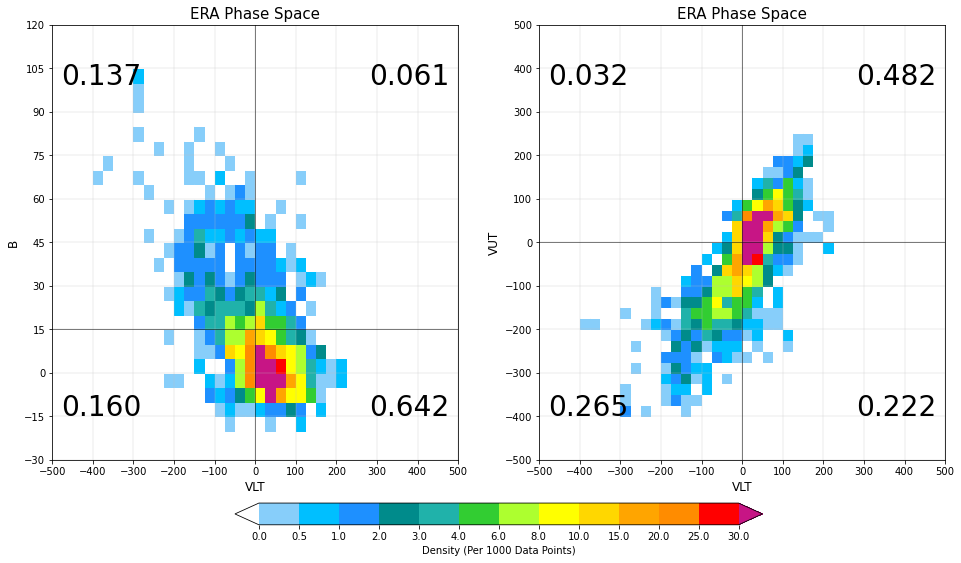

In [17]:
# Plot Cyclone Phase Distribution
def Cyclone_Phase_Dist_Plot(VLT_B, VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Bounds, Colours, Model):
    Fig = pyplot.figure(figsize=(16,8))
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B)):
        for k in range(len(VLT_B[0])):
            Colour = Dist_Colour(VLT_B[j][k])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(-1000,1000,100)
    y_Axis = numpy.arange(-90,180,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(VLT_Bins[0],VLT_Bins[len(VLT_Bins)-1])
    pyplot.ylim(B_Bins[0],B_Bins[len(B_Bins)-1])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-90,180], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_B, "B", VLT_Bins, B_Bins, VUT_Bins)
    xloc = [0.88,0.12,0.12,0.88]
    yloc = [0.88,0.88,0.12,0.12]
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT)):
        for l in range(len(VLT_VUT[0])):
            Colour = Dist_Colour(VLT_VUT[j][l])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VUT_Bins[l], VUT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(-1000,1000,100)
    y_Axis = numpy.arange(-1000,1000,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(VLT_Bins[0],VLT_Bins[len(VLT_Bins)-1])
    pyplot.ylim(VUT_Bins[0],VUT_Bins[len(VLT_Bins)-1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_VUT, "VUT", VLT_Bins, B_Bins, VUT_Bins)
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label='Density (Per 1000 Data Points)', ticks=Bounds, shrink=0.7)
    return (Fig)
Fig = Cyclone_Phase_Dist_Plot(ERA_VLT_B, ERA_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "ERA")

In [18]:
# Repeat For NX2
NX2_DF_Init, NX2_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/zarzycki2017_data/traj_et_nx2_avg')
NX2_DF = Cyclone_Type(NX2_DF_Init, NX2_Storm_List)
NX2_DF

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z),Type,Shape,Colour
0,0000,-63.75,24.75,998.84,25.4,278.00,0.00,-6.89,143.69,-42.20,1980-05-08 12:00:00,Tropical,o,darkcyan
1,0000,-64.25,24.75,997.17,23.5,50.49,270.00,-9.26,140.63,-31.88,1980-05-08 18:00:00,Tropical,o,darkcyan
2,0000,-63.75,25.25,997.59,22.6,75.04,42.08,-5.54,140.67,-12.10,1980-05-09 00:00:00,Tropical,o,darkcyan
3,0000,-63.75,25.25,997.07,23.1,0.00,0.00,-6.60,135.82,17.87,1980-05-09 06:00:00,Tropical,o,darkcyan
4,0000,-62.75,25.25,995.09,25.0,100.57,90.00,-3.01,138.31,40.32,1980-05-09 12:00:00,Tropical,o,darkcyan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,0290,-43.75,46.75,995.58,21.4,255.15,48.61,0.72,7.84,19.31,2002-12-26 06:00:00,Tropical,o,darkcyan
5540,0290,-40.75,48.25,998.12,20.8,280.35,52.91,3.03,-25.61,-32.33,2002-12-26 12:00:00,Transition,s,darkcyan
5541,0290,-37.25,49.75,997.76,28.6,304.94,56.26,14.57,-87.43,-93.00,2002-12-26 18:00:00,Transition,s,darkcyan
5542,0290,-37.75,52.75,998.57,26.4,335.40,354.31,16.73,-113.17,-129.00,2002-12-27 00:00:00,Extratropical,^,darkcyan


In [19]:
# Plot Cyclone Track
#Plot_Cyclone_Track(NX2_Storm_List[30], NX2_DF, SLP_Bounds, SLP_Colours, 4)

In [20]:
# Plot Cyclone Phase Diagram
#Plot_Cyclone_Phase(NX2_Storm_List[30], NX2_DF, SLP_Bounds, SLP_Colours, 1)

In [21]:
# Plot Cyclone SLP
#Plot_Cyclone_SLP(NX2_Storm_List[30], NX2_DF, SLP_Bounds, SLP_Colours, 3)

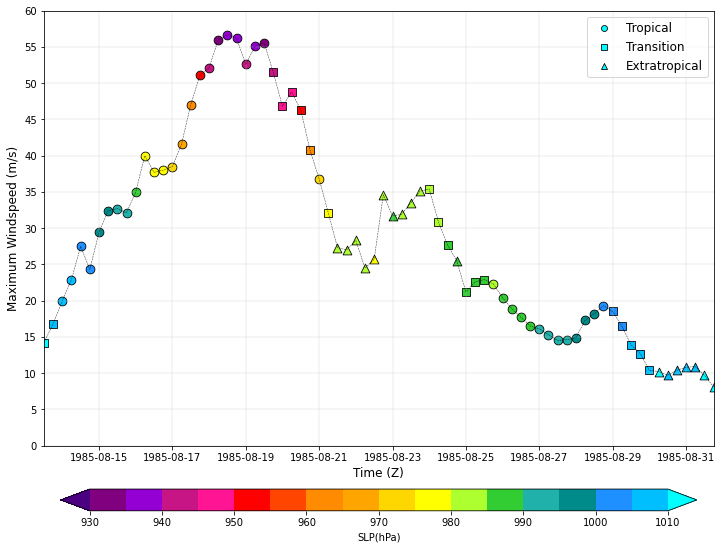

In [22]:
# Plot Cyclone Windspeed
Plot_Cyclone_Winds(NX2_Storm_List[30], NX2_DF, SLP_Bounds, SLP_Colours, 1)

In [23]:
# Plot Cyclone Track
#Plot_Cyclone_Track(NX2_Storm_List[119], NX2_DF, SLP_Bounds, SLP_Colours, 4)

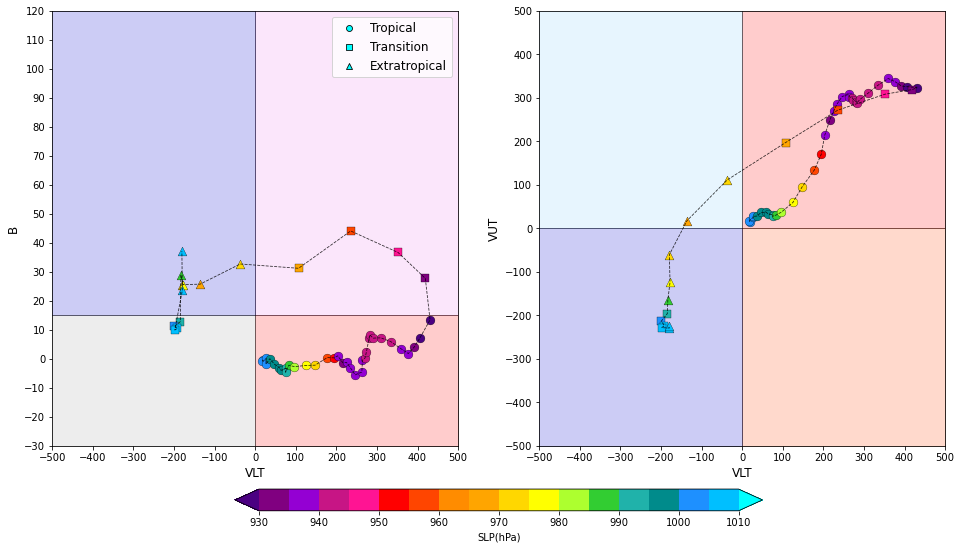

In [24]:
# Plot Cyclone Phase Diagram
Plot_Cyclone_Phase(NX2_Storm_List[119], NX2_DF, SLP_Bounds, SLP_Colours, 1)

In [25]:
# Plot Cyclone SLP
#Plot_Cyclone_SLP(NX2_Storm_List[119], NX2_DF, SLP_Bounds, SLP_Colours, 3)

In [26]:
# Plot Cyclone Windspeed
#Plot_Cyclone_Winds(NX2_Storm_List[119], NX2_DF, SLP_Bounds, SLP_Colours, 2)

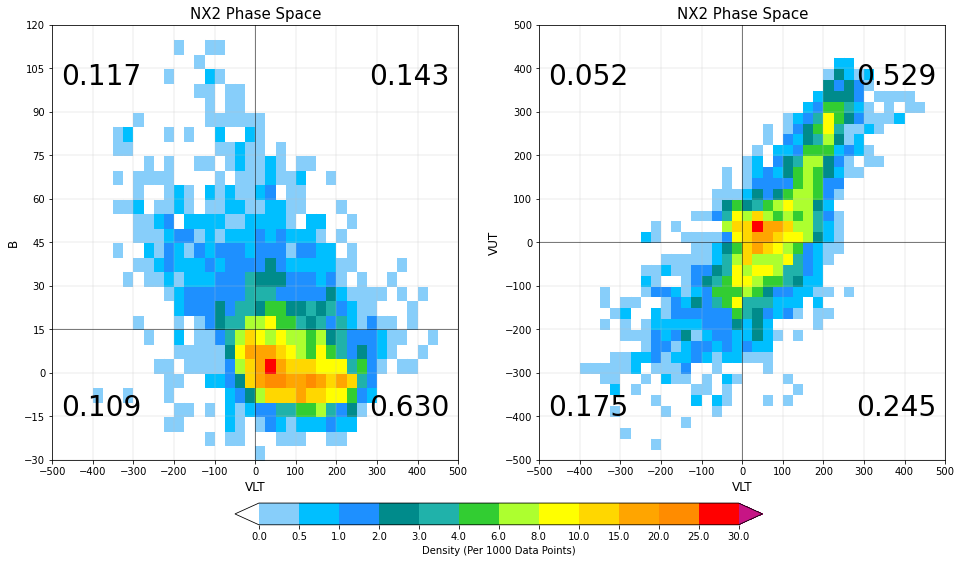

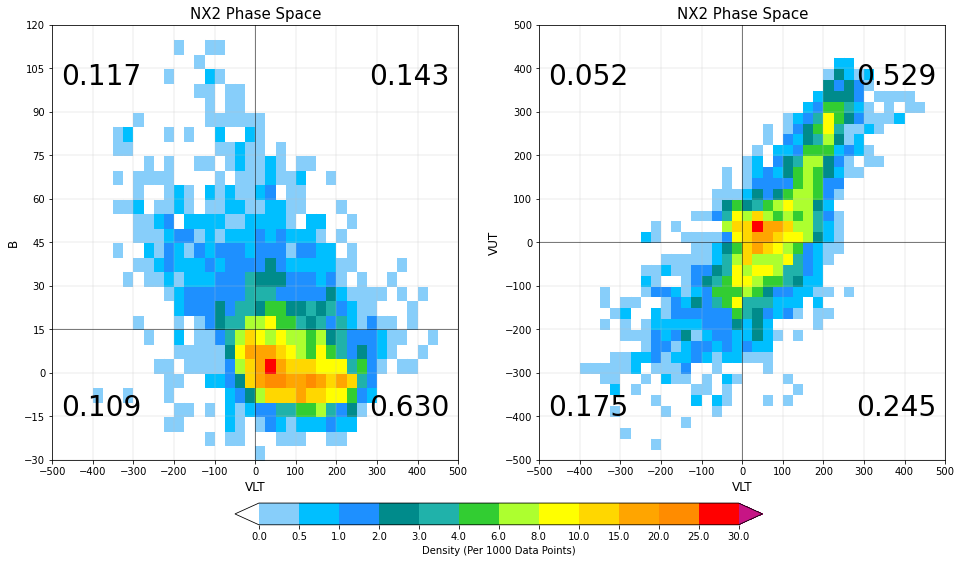

In [27]:
# Create Cyclone Phase Distribution Plot
NX2_VLT_B, NX2_VLT_VUT = Phase_Space_Distribution(NX2_DF, VLT_Bins, B_Bins, VUT_Bins)
Cyclone_Phase_Dist_Plot(NX2_VLT_B, NX2_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "NX2")

In [28]:
# Repeat For NX4
NX4_DF_Init, NX4_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/zarzycki2017_data/traj_et_nx4_avg')
NX4_DF = Cyclone_Type(NX4_DF_Init, NX4_Storm_List)
NX4_DF

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z),Type,Shape,Colour
0,0000,-37.75,22.75,989.68,27.6,122.53,24.69,23.30,43.59,-121.48,1980-01-22 06:00:00,Transition,s,limegreen
1,0000,-36.75,22.25,988.88,29.7,116.81,118.34,27.14,56.80,-114.76,1980-01-22 12:00:00,Transition,s,limegreen
2,0000,-34.75,22.75,985.97,32.0,212.86,74.81,31.60,77.05,-83.40,1980-01-22 18:00:00,Transition,s,limegreen
3,0000,-31.75,25.75,980.01,39.1,451.40,41.75,32.47,92.45,-53.73,1980-01-23 00:00:00,Transition,s,greenyellow
4,0000,-30.25,29.75,965.02,43.9,468.63,17.83,29.57,121.36,-17.94,1980-01-23 06:00:00,Transition,s,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,0368,-34.75,42.25,968.67,37.2,488.83,36.13,20.05,92.44,-153.72,2002-11-15 00:00:00,Transition,s,orange
8762,0368,-31.25,45.75,968.09,38.4,479.32,34.53,20.42,62.50,-138.16,2002-11-15 06:00:00,Transition,s,orange
8763,0368,-27.25,48.75,975.03,35.9,449.81,40.96,19.93,15.42,-117.89,2002-11-15 12:00:00,Transition,s,yellow
8764,0368,-21.25,51.75,980.37,32.9,541.27,50.70,19.32,-9.16,-102.43,2002-11-15 18:00:00,Extratropical,^,greenyellow


In [29]:
# Plot Cyclone Track
#Plot_Cyclone_Track(NX4_Storm_List[114], NX4_DF, SLP_Bounds, SLP_Colours, 1)

In [30]:
# Plot Cyclone Phase Diagram
#Plot_Cyclone_Phase(NX4_Storm_List[114], NX4_DF, SLP_Bounds, SLP_Colours, 1)

In [31]:
# Plot Cyclone SLP
#Plot_Cyclone_SLP(NX4_Storm_List[114], NX4_DF, SLP_Bounds, SLP_Colours, 3)

In [32]:
# Plot Cyclone Windspeed
#Plot_Cyclone_Winds(NX4_Storm_List[114], NX4_DF, SLP_Bounds, SLP_Colours, 2)

In [33]:
# Plot Cyclone Track
#Plot_Cyclone_Track(NX4_Storm_List[195], NX4_DF, SLP_Bounds, SLP_Colours, 2)

In [34]:
# Plot Cyclone Phase Diagram
#Plot_Cyclone_Phase(NX4_Storm_List[195], NX4_DF, SLP_Bounds, SLP_Colours, 1)

In [35]:
# Plot Cyclone SLP
#Plot_Cyclone_SLP(NX4_Storm_List[195], NX4_DF, SLP_Bounds, SLP_Colours, 3)

In [36]:
# Plot Cyclone Windspeed
#Plot_Cyclone_Winds(NX4_Storm_List[195], NX4_DF, SLP_Bounds, SLP_Colours, 2)

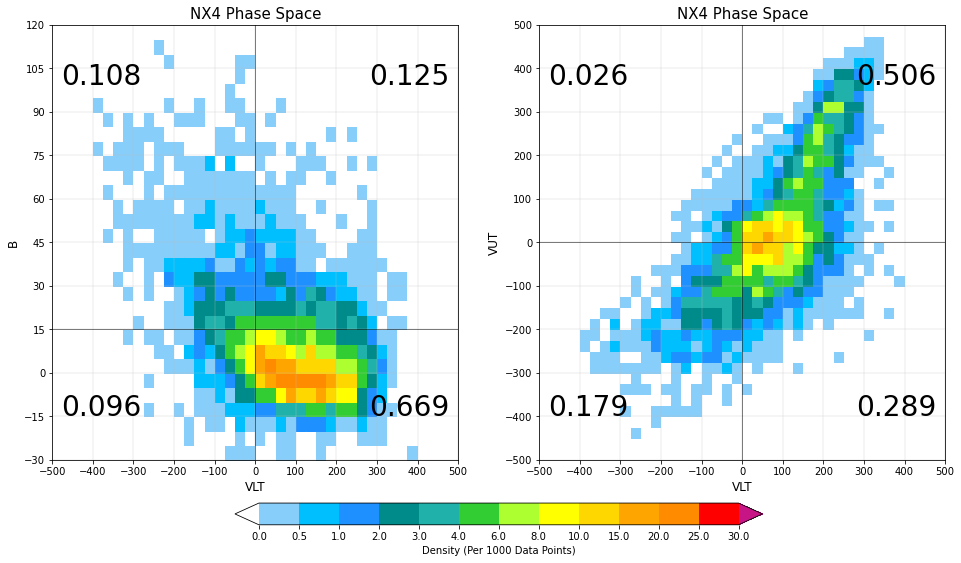

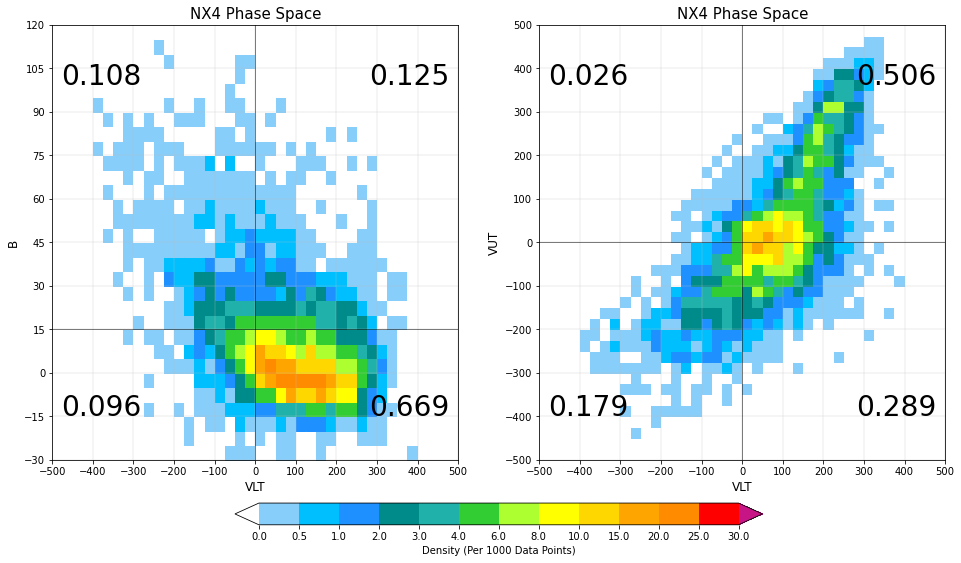

In [37]:
# Create Cyclone Phase Distribution Plot
NX4_VLT_B, NX4_VLT_VUT = Phase_Space_Distribution(NX4_DF, VLT_Bins, B_Bins, VUT_Bins)
Cyclone_Phase_Dist_Plot(NX4_VLT_B, NX4_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "NX4")

In [38]:
# Repeat For REA
REA_DF_Init, REA_Storm_List = Create_DF('/glade/u/home/whimkao//ExtraTrack/ExTraTrack/et-tracker/zarzycki2017_data/traj_et_rea_avg')
REA_DF = Cyclone_Type(REA_DF_Init, REA_Storm_List)
REA_DF

,Code,Lon,Lat,SLP(hPa),Winds(m/s),Dist(m),Angle,B,VLT,VUT,Time(Z),Type,Shape,Colour
0,0003,-40.5,10.5,1009.46,19.9,218.67,270.00,6.14,36.70,2.54,1980-08-01 18:00:00,Tropical,o,deepskyblue
1,0003,-42.5,11.0,1010.33,19.5,225.46,284.30,7.01,36.14,6.09,1980-08-02 00:00:00,Tropical,o,cyan
2,0003,-44.5,11.5,1008.26,19.6,225.10,284.33,8.15,38.99,5.86,1980-08-02 06:00:00,Tropical,o,deepskyblue
3,0003,-47.0,12.0,1009.38,21.1,277.79,281.57,8.02,39.87,19.78,1980-08-02 12:00:00,Tropical,o,deepskyblue
4,0003,-49.0,12.5,1007.14,22.0,224.33,284.38,9.22,42.78,25.89,1980-08-02 18:00:00,Tropical,o,deepskyblue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4936,0318,-49.0,37.5,999.69,32.7,226.72,104.12,38.96,-44.79,-152.90,2002-10-16 06:00:00,Extratropical,^,darkcyan
4937,0318,-47.0,37.0,1002.60,36.0,185.55,107.35,37.55,-58.91,-129.87,2002-10-16 12:00:00,Extratropical,^,dodgerblue
4938,0318,-45.5,35.5,1002.25,24.9,214.27,140.67,32.02,-75.26,-110.95,2002-10-16 18:00:00,Extratropical,^,dodgerblue
4939,0318,-44.0,34.0,1005.41,18.7,215.87,140.16,31.60,-95.01,-90.19,2002-10-17 00:00:00,Extratropical,^,deepskyblue


In [39]:
# Plot Cyclone Track
#Plot_Cyclone_Track(REA_Storm_List[39], REA_DF, SLP_Bounds, SLP_Colours, 2)

In [40]:
# Plot Cyclone Phase Diagram
#Plot_Cyclone_Phase(REA_Storm_List[39], REA_DF, SLP_Bounds, SLP_Colours, 1)

In [41]:
# Plot Cyclone SLP
#Plot_Cyclone_SLP(REA_Storm_List[39], REA_DF, SLP_Bounds, SLP_Colours, 3)

In [42]:
# Plot Cyclone Windspeed
#Plot_Cyclone_Winds(REA_Storm_List[39], REA_DF, SLP_Bounds, SLP_Colours, 2)

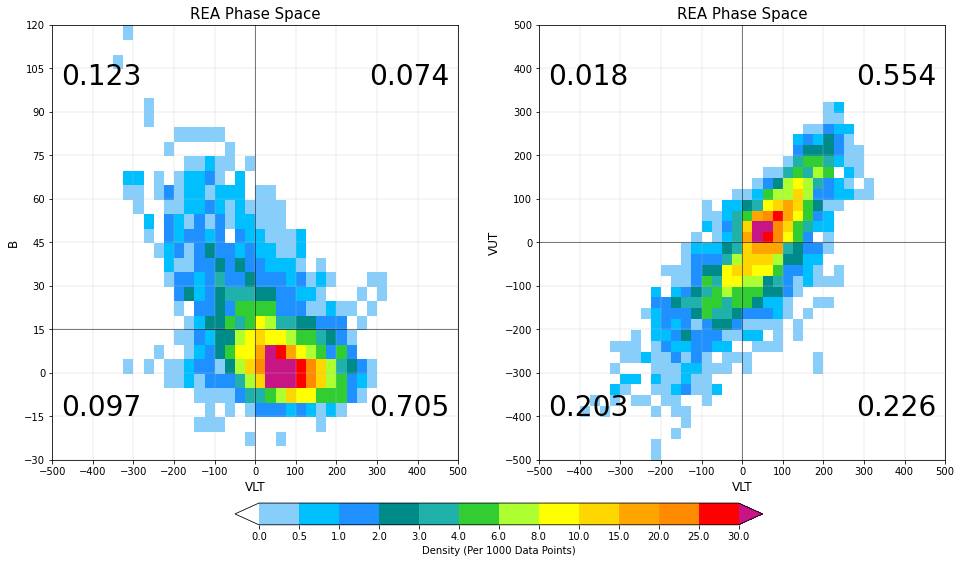

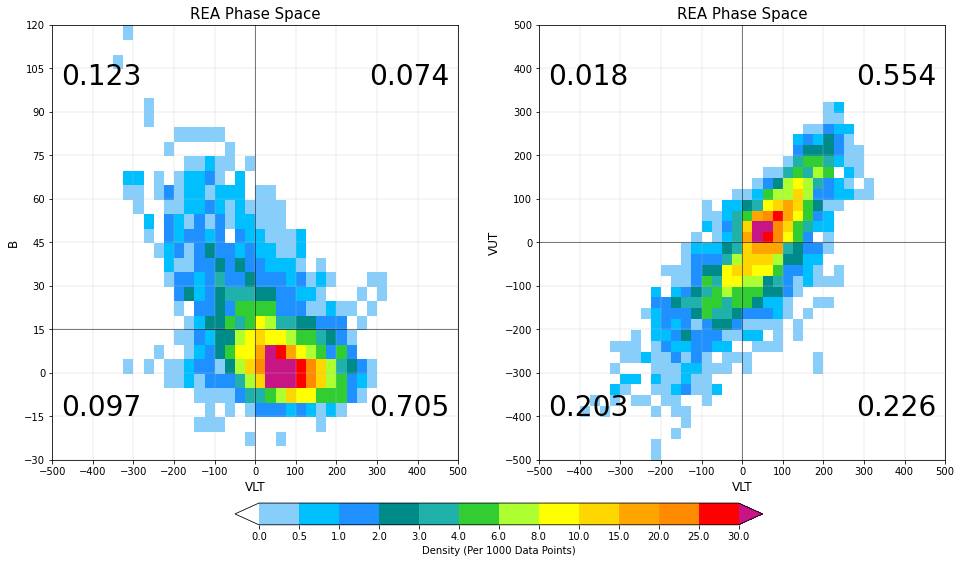

In [43]:
# Create Cyclone Phase Distribution Plot
REA_VLT_B, REA_VLT_VUT = Phase_Space_Distribution(REA_DF, VLT_Bins, B_Bins, VUT_Bins)
Cyclone_Phase_Dist_Plot(REA_VLT_B, REA_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "REA")

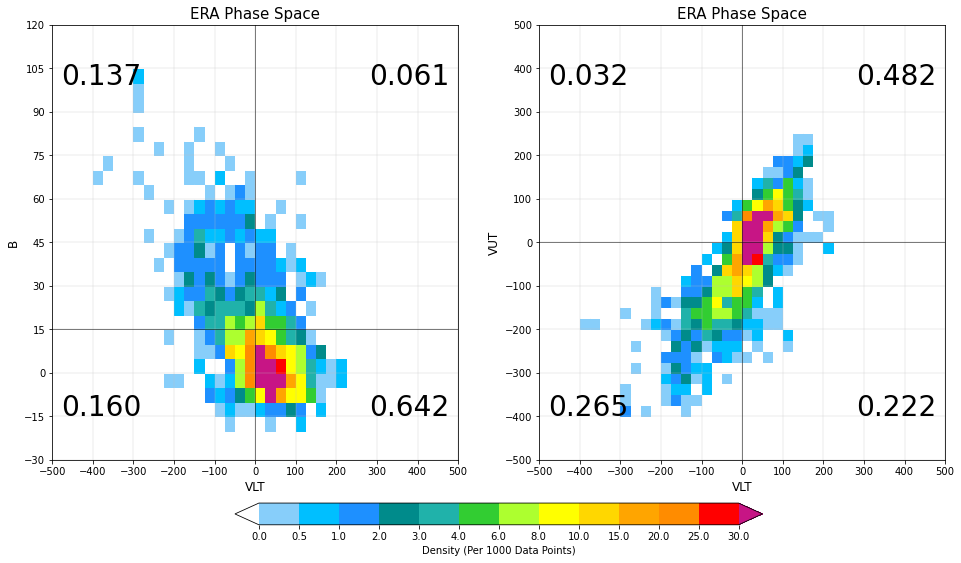

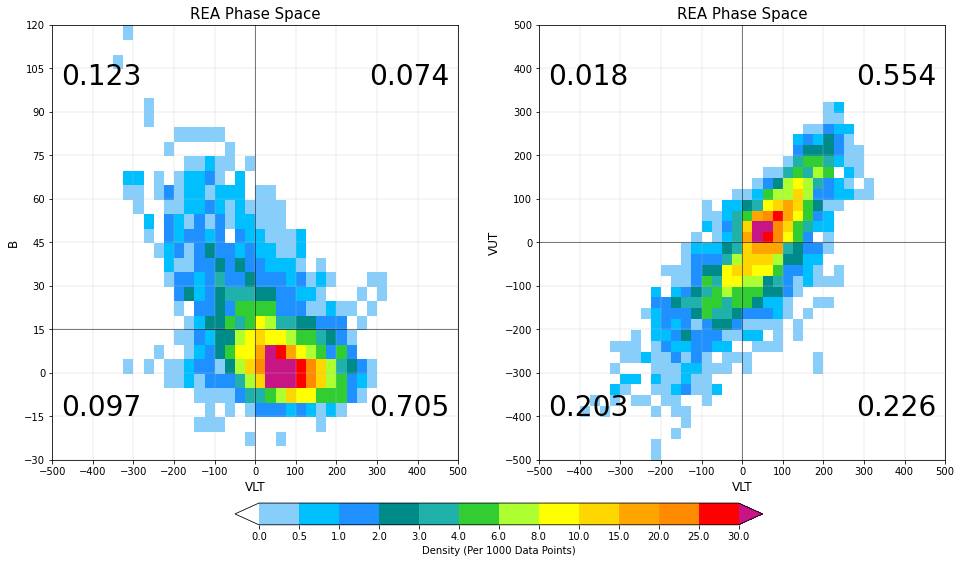

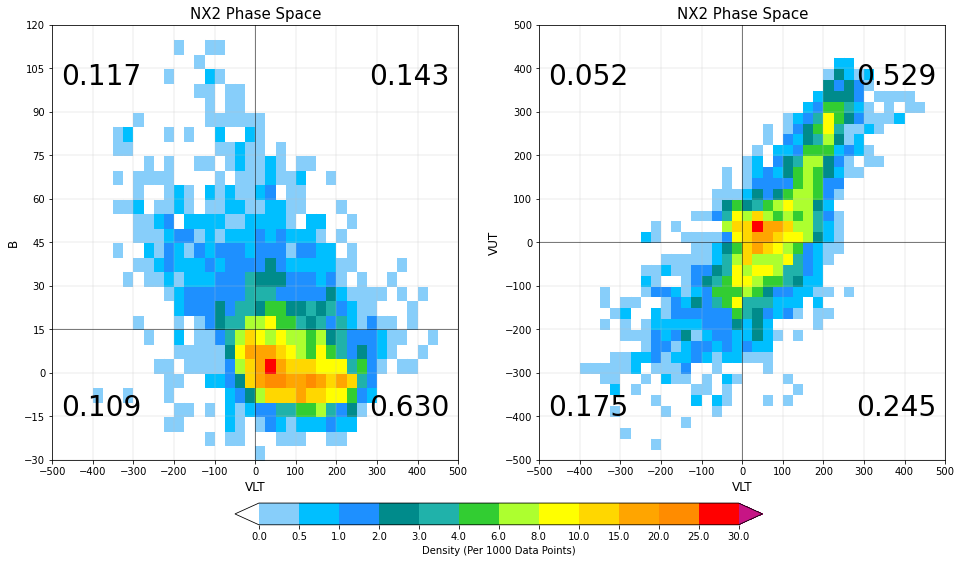

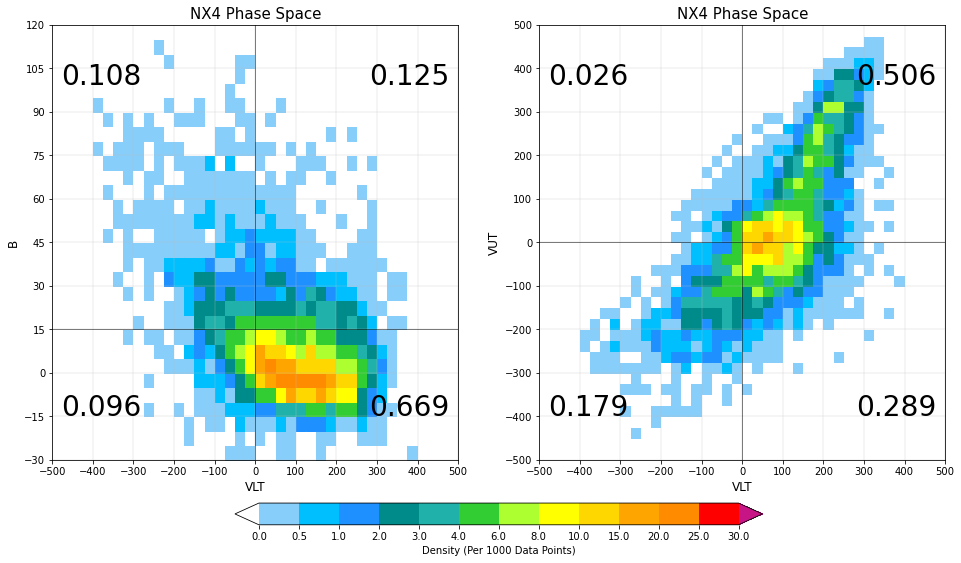

In [44]:
# All Cyclone Phase Distribution Plots
Fig1 = Cyclone_Phase_Dist_Plot(ERA_VLT_B, ERA_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "ERA")
Fig1.savefig('/glade/u/home/whimkao//ExtraTrack/ERA_Phase_Space.png', bbox_inches='tight')
Fig2 = Cyclone_Phase_Dist_Plot(REA_VLT_B, REA_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "REA")
Fig2.savefig('/glade/u/home/whimkao//ExtraTrack/REA_Phase_Space.png', bbox_inches='tight')
Fig3 = Cyclone_Phase_Dist_Plot(NX2_VLT_B, NX2_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "NX2")
Fig3.savefig('/glade/u/home/whimkao//ExtraTrack/NX2_Phase_Space.png', bbox_inches='tight')
Fig4 = Cyclone_Phase_Dist_Plot(NX4_VLT_B, NX4_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "NX4")
Fig4.savefig('/glade/u/home/whimkao//ExtraTrack/NX4_Phase_Space.png', bbox_inches='tight')

In [45]:
# Calculate Difference Between Models
def Cyclone_Phase_Diff(B_1, VUT_1, B_2, VUT_2):
    B_Diff = B_1 - B_2
    VUT_Diff = VUT_1 - VUT_2
    return (B_Diff, VUT_Diff)
ERA_REA_B_Diff, ERA_REA_VUT_Diff = Cyclone_Phase_Diff(ERA_VLT_B, ERA_VLT_VUT, REA_VLT_B, REA_VLT_VUT)

In [46]:
ERA_REA_B_Diff[28]

array([ 0.        ,  0.        ,  0.        , -0.20238818, -4.65492815,
       -4.94847825, -2.3174319 , -4.45253997, -1.0119409 , -1.41671726,
       -0.40477636,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [47]:
# Create Function of Colours of Cyclone Phase Difference Plots
Diff_Colours = ['navy', 'mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'aquamarine', 'limegreen', 'greenyellow', \
'white', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'mediumvioletred', 'darkmagenta']
Diff_Bounds = numpy.array([-30,-20,-10,-5,-2.5,-1,-0.5,-0.0001,\
0,0.5,1,2.5,5,10,20,30])
Diff_Colour_Labels = ['<-30', '-30~-20', '-20~-10', '-10~-5', '-5~-2.5', '-2.5~-1', '-1~-0.5', '-0.5~0', \
'0', '0~0.5', '0.5~1', '1~2.5', '2.5~5', '5~10', '10~20', '20~30', '>30']
def Diff_Colour(Diff):
    for k in range(len(Diff_Colours)):
        if k == 0:
            if Diff < Diff_Bounds[k]:
                Colour = Diff_Colours[k]
        elif k < int(len(Diff_Bounds)/2):
            if Diff < Diff_Bounds[k] and Diff >= Diff_Bounds[k-1]:
                Colour = Diff_Colours[k]
        elif k == int(len(Diff_Bounds)/2):
            if Diff == Diff_Bounds[k]:
                Colour = Diff_Colours[k]
        elif k < len(Diff_Colours)-1:
            if Diff <= Diff_Bounds[k] and Diff > Diff_Bounds[k-1]:
                Colour = Diff_Colours[k]
        else:
            if Diff > Diff_Bounds[k-1]:
                Colour = Diff_Colours[k]
    return (Colour)

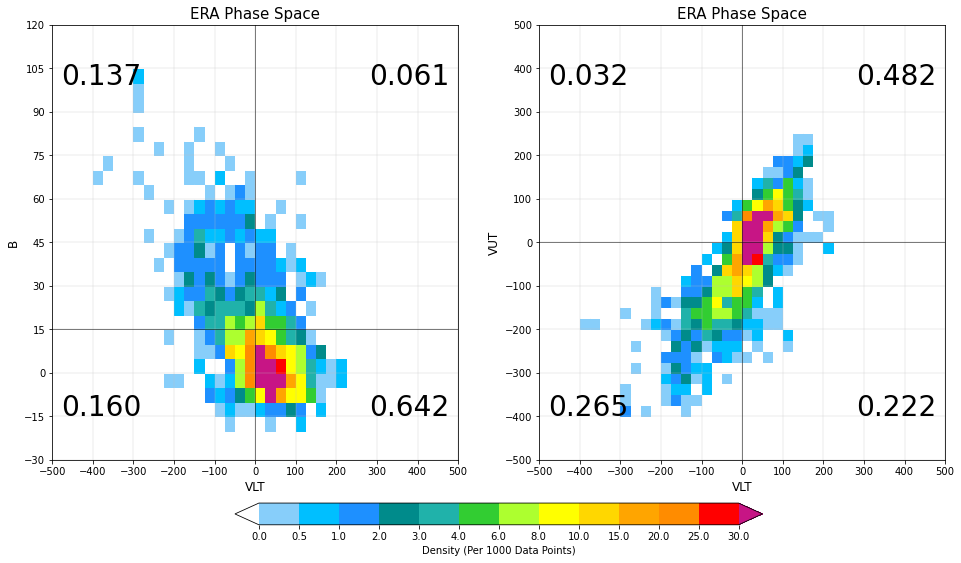

In [49]:
# Plot Cyclone Phase Distribution
def Cyclone_Phase_Dist_Plot(VLT_B, VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Bounds, Colours, Model):
    Fig = pyplot.figure(figsize=(16,8))
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B)):
        for k in range(len(VLT_B[0])):
            Colour = Dist_Colour(VLT_B[j][k])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(-1000,1000,100)
    y_Axis = numpy.arange(-90,180,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(VLT_Bins[0],VLT_Bins[len(VLT_Bins)-1])
    pyplot.ylim(B_Bins[0],B_Bins[len(B_Bins)-1])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-90,180], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_B, "B", VLT_Bins, B_Bins, VUT_Bins)
    xloc = [0.88,0.12,0.12,0.88]
    yloc = [0.88,0.88,0.12,0.12]
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT)):
        for l in range(len(VLT_VUT[0])):
            Colour = Dist_Colour(VLT_VUT[j][l])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VUT_Bins[l], VUT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(-1000,1000,100)
    y_Axis = numpy.arange(-1000,1000,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(VLT_Bins[0],VLT_Bins[len(VLT_Bins)-1])
    pyplot.ylim(VUT_Bins[0],VUT_Bins[len(VLT_Bins)-1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model + ' Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = Phase_Space_Quadrant(VLT_VUT, "VUT", VLT_Bins, B_Bins, VUT_Bins)
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Colours, N=len(Colours))
    Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label='Density (Per 1000 Data Points)', ticks=Bounds, shrink=0.7)
    return (Fig)
Fig = Cyclone_Phase_Dist_Plot(ERA_VLT_B, ERA_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, Dist_Bounds, Dist_Colours, "ERA")

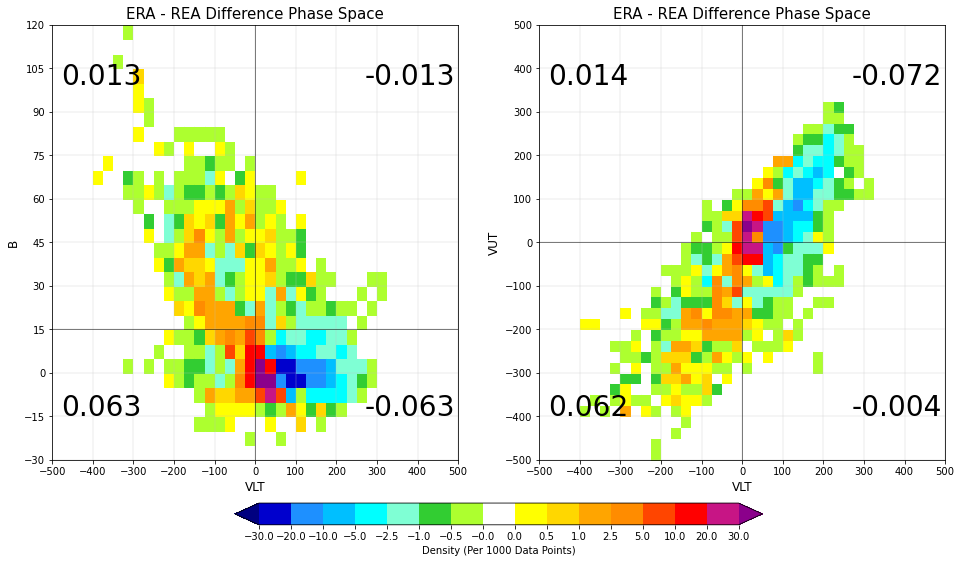

In [53]:
# Plot Cyclone Phase Distribution Difference Between ERA and REA
def Cyclone_Phase_Diff_Plot(Model_1, Model_2, VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2, VLT_Bins, B_Bins, VUT_Bins, \
Diff_Bounds, Diff_Colours):
# Apply Difference Between Models Function
    VLT_B_Diff, VLT_VUT_Diff = Cyclone_Phase_Diff(VLT_B_1, VLT_VUT_1, VLT_B_2, VLT_VUT_2)
    Fig = pyplot.figure(figsize=(16,8))
#
# VLT B Distribution
    Axis = Fig.add_subplot(1,2,1)
    for j in range(len(VLT_B_Diff)):
        for k in range(len(VLT_B_Diff[0])):
            Colour = Diff_Colour(VLT_B_Diff[j][k])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], B_Bins[k], B_Bins[k+1], color=Colour)
    x_Axis = numpy.arange(-1000,1000,100)
    y_Axis = numpy.arange(-90,180,15)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(VLT_Bins[0],VLT_Bins[len(VLT_Bins)-1])
    pyplot.ylim(B_Bins[0],B_Bins[len(B_Bins)-1])
    pyplot.plot([-1000,1000], [15,15], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-90,180], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('B', fontsize=12)
    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = numpy.array(Phase_Space_Quadrant(VLT_B_1, "B", VLT_Bins, B_Bins, VUT_Bins)) \
    - numpy.array(Phase_Space_Quadrant(VLT_B_2, "B", VLT_Bins, B_Bins, VUT_Bins))
    xloc = [0.88,0.12,0.12,0.88]
    yloc = [0.88,0.88,0.12,0.12]
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# VLT VUT Distribution
    Axis = Fig.add_subplot(1,2,2)
    for j in range(len(VLT_VUT_Diff)):
        for l in range(len(VLT_VUT_Diff[0])):
            Colour = Diff_Colour(VLT_VUT_Diff[j][l])
            pyplot.fill_between([VLT_Bins[j],VLT_Bins[j+1]], VUT_Bins[l], VUT_Bins[l+1], color=Colour)
    x_Axis = numpy.arange(-1000,1000,100)
    y_Axis = numpy.arange(-1000,1000,100)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    pyplot.xlim(VLT_Bins[0],VLT_Bins[len(VLT_Bins)-1])
    pyplot.ylim(VUT_Bins[0],VUT_Bins[len(VLT_Bins)-1])
    pyplot.plot([-1000,1000], [0,0], 'black', linewidth=0.5)
    pyplot.plot([0,0], [-1000,1000], 'black', linewidth=0.5)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')
    pyplot.xlabel('VLT', fontsize=12)
    pyplot.ylabel('VUT', fontsize=12)
    pyplot.title(str(Model_1 + ' - ' + Model_2 + ' Difference Phase Space'), fontsize=15)
# Add Quadrant Percent
    Quadrant_Percent = numpy.array(Phase_Space_Quadrant(VLT_VUT_1, "VUT",  VLT_Bins, B_Bins, VUT_Bins)) \
    - numpy.array(Phase_Space_Quadrant(VLT_VUT_2, "VUT",  VLT_Bins, B_Bins, VUT_Bins))
    for q in range(len(Quadrant_Percent)):
        Axis.text(xloc[q], yloc[q], str('%5.3f' % Quadrant_Percent[q]), ha='center', va='center', \
        transform=Axis.transAxes, fontdict={'size':28},color='black')
#
# Colour Bar
    C_Map = mcolors.LinearSegmentedColormap.from_list("Density (10^-3)", Diff_Colours, N=len(Diff_Colours))
    Norm = mcolors.BoundaryNorm(Diff_Bounds, C_Map.N, extend='both')
    Cax = Axis.inset_axes([-0.75, -0.15, 1.3, 0.05], transform=Axis.transAxes)
    Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', cax=Cax, \
    label='Density (Per 1000 Data Points)', ticks=Diff_Bounds, shrink=0.7)
    return (Fig)
Fig = Cyclone_Phase_Diff_Plot("ERA", "REA", ERA_VLT_B, ERA_VLT_VUT, REA_VLT_B, REA_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, \
Diff_Bounds, Diff_Colours)
Fig.savefig('ERA_REA_Phase_Space_Diff.png', bbox_inches='tight')

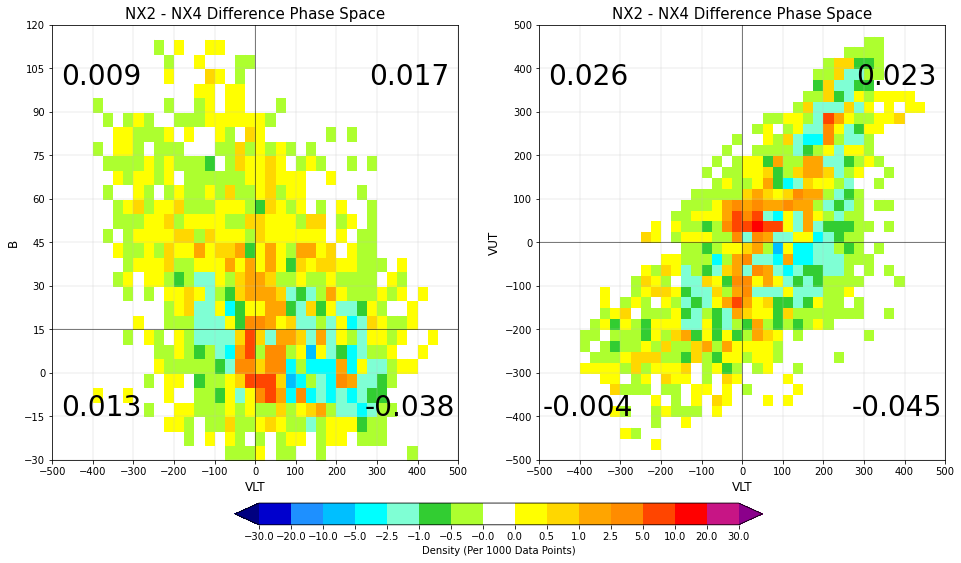

In [54]:
# Plot Cyclone Phase Distribution Difference Between NX2 and NX4
Cyclone_Phase_Diff_Plot("NX2", "NX4", NX2_VLT_B, NX2_VLT_VUT, NX4_VLT_B, NX4_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, \
Diff_Bounds, Diff_Colours)
Fig.savefig('NX2_NX4_Phase_Space_Diff.png', bbox_inches='tight')

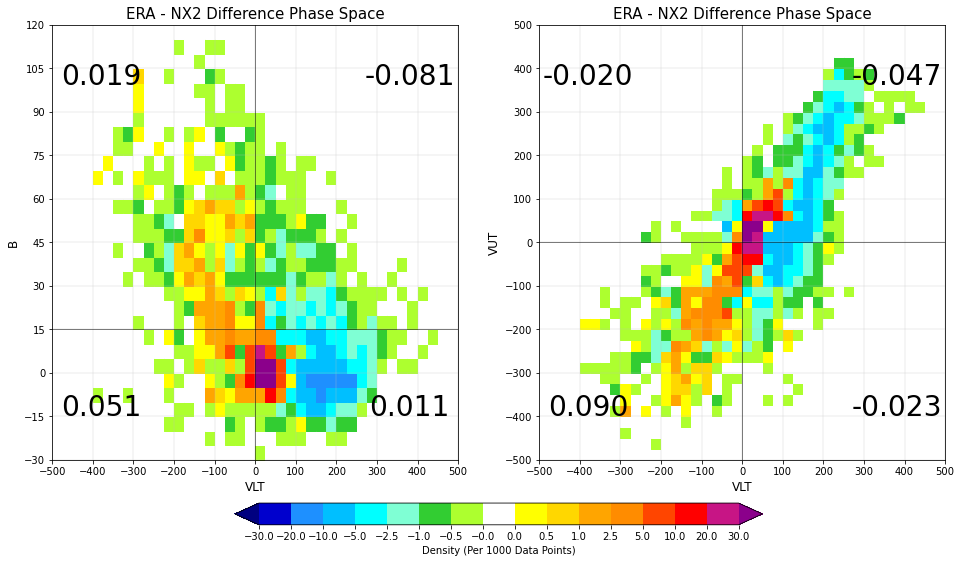

In [55]:
# Plot Cyclone Phase Distribution Difference Between ERA and NX2
Cyclone_Phase_Diff_Plot("ERA", "NX2", ERA_VLT_B, ERA_VLT_VUT, NX2_VLT_B, NX2_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, \
Diff_Bounds, Diff_Colours)
Fig.savefig('ERA_NX2_Phase_Space_Diff.png', bbox_inches='tight')

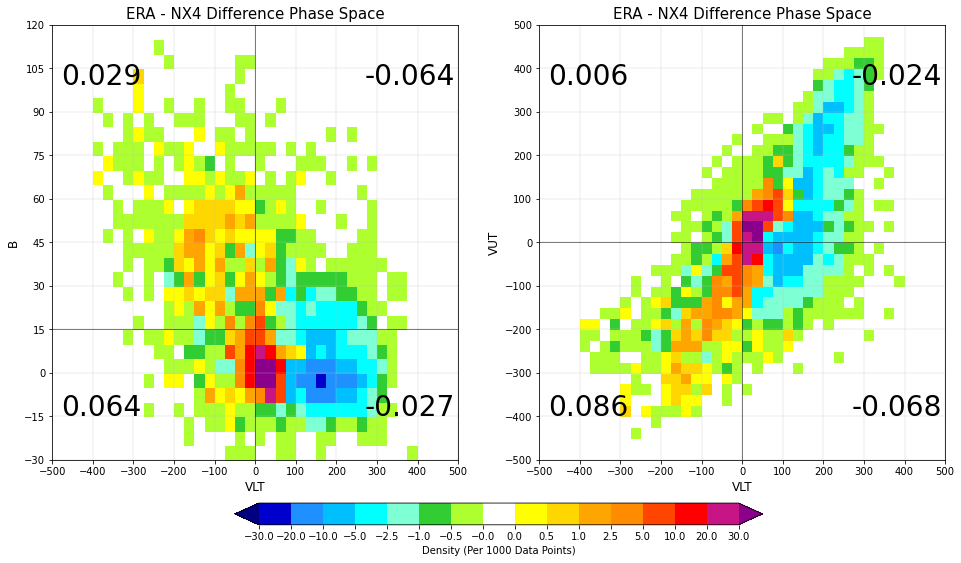

In [56]:
# Plot Cyclone Phase Distribution Difference Between ERA and NX4
Cyclone_Phase_Diff_Plot("ERA", "NX4", ERA_VLT_B, ERA_VLT_VUT, NX4_VLT_B, NX4_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, \
Diff_Bounds, Diff_Colours)
Fig.savefig('ERA_NX4_Phase_Space_Diff.png', bbox_inches='tight')

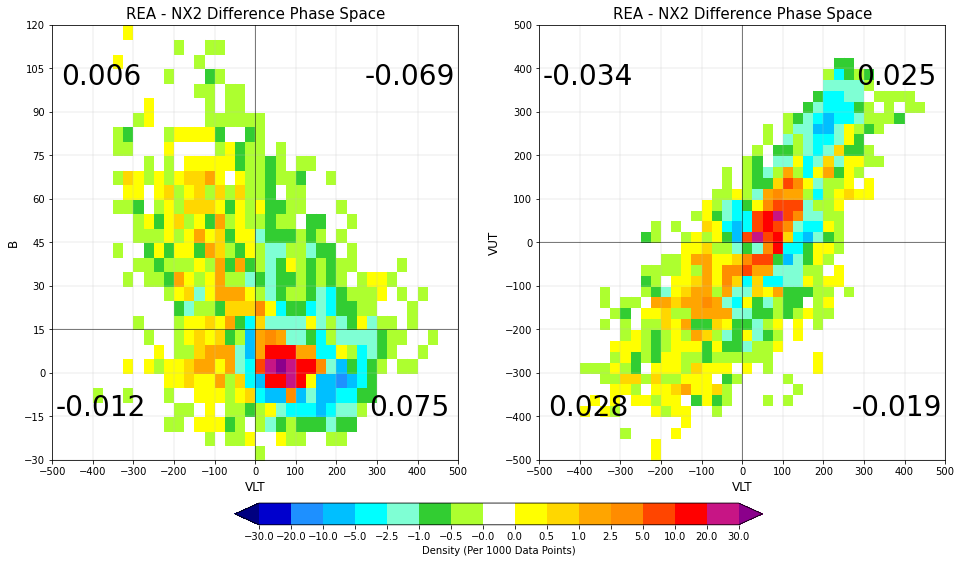

In [57]:
# Plot Cyclone Phase Distribution Difference Between REA and NX2
Cyclone_Phase_Diff_Plot("REA", "NX2", REA_VLT_B, REA_VLT_VUT, NX2_VLT_B, NX2_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, \
Diff_Bounds, Diff_Colours)
Fig.savefig('REA_NX2_Phase_Space_Diff.png', bbox_inches='tight')

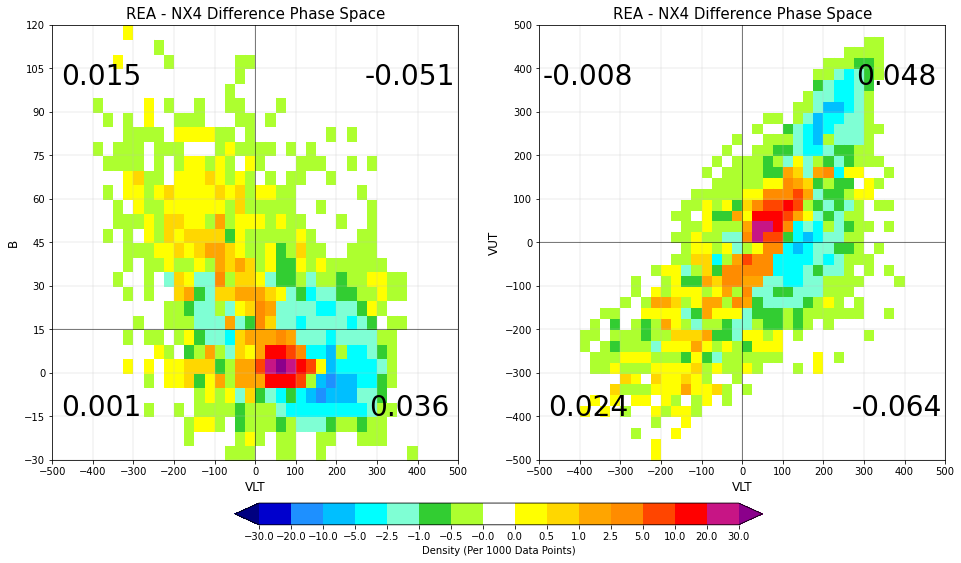

In [58]:
# Plot Cyclone Phase Distribution Difference Between REA and NX4
Cyclone_Phase_Diff_Plot("REA", "NX4", REA_VLT_B, REA_VLT_VUT, NX4_VLT_B, NX4_VLT_VUT, VLT_Bins, B_Bins, VUT_Bins, \
Diff_Bounds, Diff_Colours)
Fig.savefig('REA_NX4_Phase_Space_Diff.png', bbox_inches='tight')